In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

from PIL import Image
import requests
from io import BytesIO

In [2]:
alist=fits.open('/Users/gengshaoze/Desktop/Topcat/all13th_Mar.fits')
a=alist[1].data

In [3]:
i = 21170
ra = a['RA_A'][i]
dec = a['DEC_A'][i]
url='https://www.legacysurvey.org/viewer/jpeg-cutout?ra='\
+np.str(ra)+'&dec='+np.str(dec)+'&layer=ls-dr9&pixscale=0.27&bands=grz'

response = requests.get(url)

img = Image.open(BytesIO(response.content))
print(np.shape(img))

/var/folders/_3/r4q2sf354138cwl4p6n956y00000gn/T/ipykernel_17246/2011987996.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  +np.str(ra)+'&dec='+np.str(dec)+'&layer=ls-dr9&pixscale=0.27&bands=grz'


(256, 256, 3)


In [4]:
image = np.copy(img)
data0 = image[:,:,1]

In [5]:
data0

array([[20, 21, 22, ..., 23, 34, 29],
       [30, 35, 34, ..., 40, 43, 29],
       [32, 35, 30, ..., 31, 33, 23],
       ...,
       [56, 40, 27, ..., 79, 69, 85],
       [48, 40, 30, ..., 77, 63, 61],
       [33, 39, 39, ..., 86, 74, 43]], dtype=uint8)

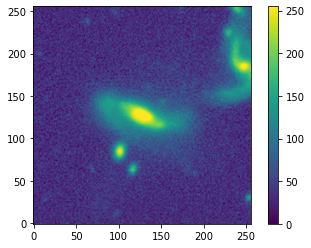

In [6]:
plt.imshow(data0, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

In [7]:
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
#创建一个MedianBackground类的实例，该实例将被用来计算背景噪声的估计值。

bkg = Background2D(data0, (50, 50), filter_size=(3, 3),
                   bkg_estimator=bkg_estimator)
#计算输入数据data的背景噪声。
#其中，(50,50)是指计算背景噪声所需的局部背景框的大小，
#而filter_size=(3, 3)是指使用大小为3x3的中值滤波器对数据进行平滑处理。
#最终的背景噪声估计值将存储在bkg.background中。
data1 = data0 - bkg.background # subtract the background
#将计算出的背景噪声从数据中减去，从而得到去除背景噪声后的数据。


In [8]:
bkg.background

array([[35.9545106 , 35.95478106, 35.95532197, ..., 41.10212247,
        41.09707218, 41.09075825],
       [35.95474726, 35.95501656, 35.95555515, ..., 41.1036446 ,
        41.09854954, 41.09219031],
       [35.95522057, 35.95548756, 35.95602152, ..., 41.10668887,
        41.10150424, 41.09505444],
       ...,
       [37.78485554, 37.78598438, 37.78824207, ..., 56.08719092,
        56.11432593, 56.13974518],
       [37.82356215, 37.82463469, 37.82677977, ..., 56.07904926,
        56.10663584, 56.13250278],
       [37.86166384, 37.86267897, 37.86470921, ..., 56.07120241,
        56.09922783, 56.12552944]])

In [9]:
data1

array([[-15.9545106 , -14.95478106, -13.95532197, ..., -18.10212247,
         -7.09707218, -12.09075825],
       [ -5.95474726,  -0.95501656,  -1.95555515, ...,  -1.1036446 ,
          1.90145046, -12.09219031],
       [ -3.95522057,  -0.95548756,  -5.95602152, ..., -10.10668887,
         -8.10150424, -18.09505444],
       ...,
       [ 18.21514446,   2.21401562, -10.78824207, ...,  22.91280908,
         12.88567407,  28.86025482],
       [ 10.17643785,   2.17536531,  -7.82677977, ...,  20.92095074,
          6.89336416,   4.86749722],
       [ -4.86166384,   1.13732103,   1.13529079, ...,  29.92879759,
         17.90077217, -13.12552944]])

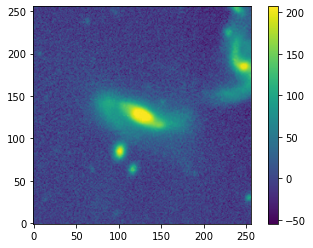

In [10]:
plt.imshow(data1, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

In [11]:
threshold = 1.5 * bkg.background_rms

In [12]:
bkg.background_rms

array([[11.3707754 , 11.37074238, 11.37067635, ..., 12.89184958,
        12.90738786, 12.92243666],
       [11.37103973, 11.37100628, 11.37093937, ..., 12.89367108,
        12.90919576, 12.92423084],
       [11.37156838, 11.37153406, 11.37146541, ..., 12.89731407,
        12.91281155, 12.92781921],
       ...,
       [14.20367603, 14.20415705, 14.20511909, ..., 25.36571913,
        25.37942759, 25.39176561],
       [14.21926395, 14.21972893, 14.22065891, ..., 25.36647229,
        25.38016765, 25.39250316],
       [14.234499  , 14.23494761, 14.23584483, ..., 25.36758021,
        25.38125245, 25.39357527]])

In [13]:
threshold

array([[17.0561631 , 17.05611358, 17.05601452, ..., 19.33777437,
        19.36108179, 19.38365499],
       [17.0565596 , 17.05650941, 17.05640905, ..., 19.34050661,
        19.36379364, 19.38634626],
       [17.05735258, 17.05730109, 17.05719812, ..., 19.3459711 ,
        19.36921733, 19.39172881],
       ...,
       [21.30551405, 21.30623558, 21.30767864, ..., 38.0485787 ,
        38.06914138, 38.08764842],
       [21.32889592, 21.3295934 , 21.33098836, ..., 38.04970843,
        38.07025147, 38.08875474],
       [21.35174849, 21.35242141, 21.35376725, ..., 38.05137031,
        38.07187867, 38.09036291]])

In [14]:
from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel

kernel = make_2dgaussian_kernel(3.0, size=5)  
# FWHM = 3.0生成一个二维高斯核，大小为5，全宽半最大值（FWHM）为3.0。
#该高斯核可以用于对输入数据进行模糊处理。

convolved_data = convolve(data1, kernel)
#将输入数据与生成的高斯核进行卷积处理，并将结果存储在变量convolved_data中

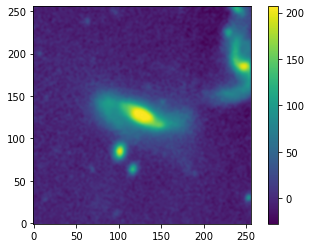

In [15]:
plt.imshow(convolved_data, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

In [16]:
from photutils.segmentation import detect_sources
segment_map = detect_sources(convolved_data, threshold, npixels=10)
#该函数接受一幅经过卷积处理的图像作为输入，以及一个阈值参数 threshold，以确定物体的边界。
#npixels 参数指定了一个被认为是源像素的最小值，这有助于过滤掉噪声或不重要的小像素。
print(segment_map)

<photutils.segmentation.core.SegmentationImage>
shape: (256, 256)
nlabels: 8
labels: [1 2 3 4 5 6 7 8]


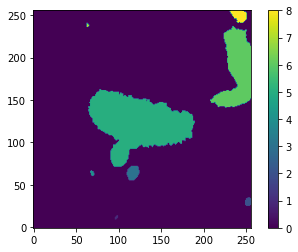

In [17]:
plt.imshow(segment_map, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

In [18]:
from photutils.segmentation import SegmentationImage

Text(0.5, 1.0, 'Segmentation Image')

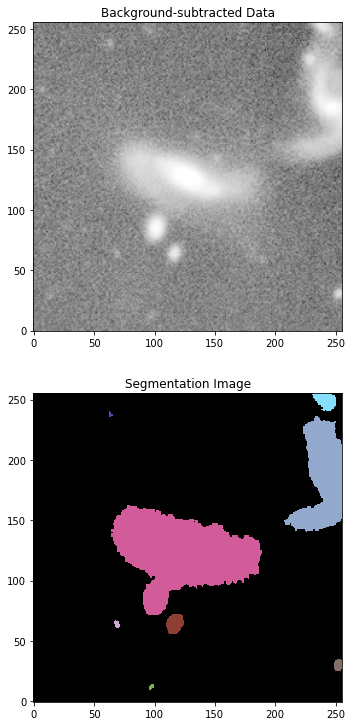

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
#定义了一个用于归一化图像的ImageNormalize对象，并采用了SqrtStretch()函数，
#它可以对图像进行对数拉伸，从而增强图像的对比度

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
#创建一个包含两个子图的图形对象fig，每个子图都被分配给一个名为ax1和ax2的坐标系对象，
#它们以二维形式排列（2,1），并设置了画布的大小为（10,12.5）

ax1.imshow(data1, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Background-subtracted Data')
#在第一个子图中，使用imshow函数显示一个名为data的图像，
#采用灰度图的颜色映射（cmap='Greys_r'），
#并使用之前定义的ImageNormalize对象来归一化图像。
#同时，将图像的原点设置为底部（origin='lower'）并给它一个标题（ax1.set_title）

ax2.imshow(segment_map, origin='lower', cmap=segment_map.cmap,
           interpolation='nearest')
ax2.set_title('Segmentation Image')

In [20]:
from photutils.segmentation import deblend_sources
segm_deblend = deblend_sources(convolved_data, segment_map,
                               npixels=10, nlevels=32, contrast=0.001,
                               progress_bar=False)

In [21]:
from photutils.segmentation import SourceFinder
finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(convolved_data, threshold)
print(segment_map)

<photutils.segmentation.core.SegmentationImage>
shape: (256, 256)
nlabels: 13
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


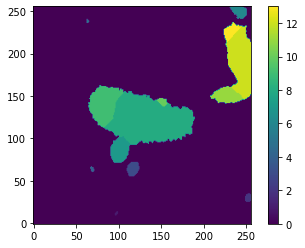

In [22]:
plt.imshow(segment_map, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

In [23]:
from photutils.segmentation import SourceCatalog
cat = SourceCatalog(data1, segm_deblend, convolved_data=convolved_data)
print(cat)

<photutils.segmentation.catalog.SourceCatalog>
Length: 13
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [24]:
tbl = cat.to_table()
# 将名为cat的数据对象转换为表格形式
tbl['xcentroid'].info.format = '.2f'  # optional format
tbl['ycentroid'].info.format = '.2f'
tbl['kron_flux'].info.format = '.2f'
print(tbl)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1     97.48     11.97 ...             nan   1165.27          nan
    2    252.34     30.33 ...             nan   4180.50          nan
    3    116.89     64.22 ...             nan  13164.23          nan
    4     69.10     63.89 ...             nan   1045.62          nan
    5     63.71    237.72 ...             nan    877.97          nan
    6    241.42    249.67 ...             nan  23403.76          nan
    7    101.54     85.89 ...             nan  45494.07          nan
    8    131.90    123.73 ...             nan 428532.47          nan
    9     84.79    139.24 ...             nan 103821.77          nan
   10    151.72    142.77 ...             nan  20791.42          nan
   11    228.21    150.64 ...             nan  44912.33          nan
   12    243.66    189.37 ...     

In [25]:
#from astropy.table import Table

# 假设您已经创建了 'tbl' 对象，并希望将其保存到名为 'table.fits' 的文件中
#tbl.write('table.csv', overwrite=True)


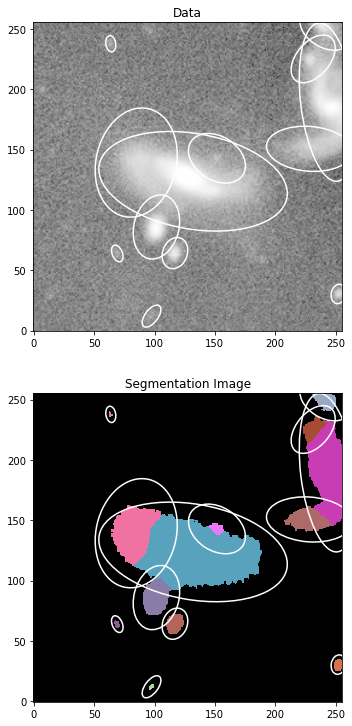

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
norm = simple_norm(data1, 'sqrt')
# 创建了一个归一化对象
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(data1, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Data')
ax2.imshow(segm_deblend, origin='lower', cmap=segm_deblend.cmap,
           interpolation='nearest')
ax2.set_title('Segmentation Image')
cat.plot_kron_apertures(ax=ax1, color='white', lw=1.5)
cat.plot_kron_apertures(ax=ax2, color='white', lw=1.5)

In [27]:
segm_deblend

<photutils.segmentation.core.SegmentationImage>
shape: (256, 256)
nlabels: 13
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]

In [28]:
p = segm_deblend.nlabels
segm1 = np.array(segm_deblend)
segm2 = SegmentationImage(segm1)

max_area = 0
max_index = 0
for i in range(1, p):
    if segm_deblend.get_area(i) > segm_deblend.get_area(i+1):
        if segm_deblend.get_area(i) > max_area:
            max_area = segm_deblend.get_area(i)
            max_index = i
    else:
        if segm_deblend.get_area(i+1) > max_area:
            max_area = segm_deblend.get_area(i+1)
            max_index = i+1

print("最大面积值的标签为：", max_index)
print("最大面积值为：", max_area)


最大面积值的标签为： 8
最大面积值为： 4375


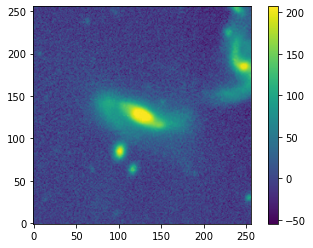

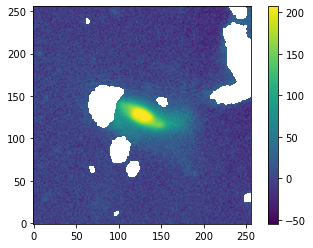

In [29]:
plt.imshow(data1,origin='lower')
plt.colorbar()
plt.show()

masked_data = np.copy(data1)
masked_data[(segm_deblend.data>0)&(segm_deblend.data!=max_index)] = np.nan
plt.imshow(masked_data,origin='lower')
plt.colorbar()
plt.show()

In [30]:
masked_data

array([[-15.9545106 , -14.95478106, -13.95532197, ..., -18.10212247,
         -7.09707218, -12.09075825],
       [ -5.95474726,  -0.95501656,  -1.95555515, ...,  -1.1036446 ,
          1.90145046, -12.09219031],
       [ -3.95522057,  -0.95548756,  -5.95602152, ..., -10.10668887,
         -8.10150424, -18.09505444],
       ...,
       [ 18.21514446,   2.21401562, -10.78824207, ...,  22.91280908,
         12.88567407,  28.86025482],
       [ 10.17643785,   2.17536531,  -7.82677977, ...,  20.92095074,
          6.89336416,   4.86749722],
       [ -4.86166384,   1.13732103,   1.13529079, ...,  29.92879759,
         17.90077217, -13.12552944]])

In [31]:
rimg = masked_data
mag=22.5-2.5*np.log10(rimg)
sbmag = 22.5 - 2.5 * np.log10(rimg / 0.262 / 0.262) 


/var/folders/_3/r4q2sf354138cwl4p6n956y00000gn/T/ipykernel_17246/1820004001.py:2: RuntimeWarning: divide by zero encountered in log10
  mag=22.5-2.5*np.log10(rimg)
/var/folders/_3/r4q2sf354138cwl4p6n956y00000gn/T/ipykernel_17246/1820004001.py:2: RuntimeWarning: invalid value encountered in log10
  mag=22.5-2.5*np.log10(rimg)
/var/folders/_3/r4q2sf354138cwl4p6n956y00000gn/T/ipykernel_17246/1820004001.py:3: RuntimeWarning: divide by zero encountered in log10
  sbmag = 22.5 - 2.5 * np.log10(rimg / 0.262 / 0.262)
/var/folders/_3/r4q2sf354138cwl4p6n956y00000gn/T/ipykernel_17246/1820004001.py:3: RuntimeWarning: invalid value encountered in log10
  sbmag = 22.5 - 2.5 * np.log10(rimg / 0.262 / 0.262)


In [32]:
rimg

array([[-15.9545106 , -14.95478106, -13.95532197, ..., -18.10212247,
         -7.09707218, -12.09075825],
       [ -5.95474726,  -0.95501656,  -1.95555515, ...,  -1.1036446 ,
          1.90145046, -12.09219031],
       [ -3.95522057,  -0.95548756,  -5.95602152, ..., -10.10668887,
         -8.10150424, -18.09505444],
       ...,
       [ 18.21514446,   2.21401562, -10.78824207, ...,  22.91280908,
         12.88567407,  28.86025482],
       [ 10.17643785,   2.17536531,  -7.82677977, ...,  20.92095074,
          6.89336416,   4.86749722],
       [ -4.86166384,   1.13732103,   1.13529079, ...,  29.92879759,
         17.90077217, -13.12552944]])

In [33]:
mag

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
        21.80228746,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [19.34891845, 21.6370483 ,         nan, ..., 19.09980416,
        19.72473214, 18.8492496 ],
       [19.98101054, 21.6561695 ,         nan, ..., 19.19854646,
        20.40392195, 20.78173572],
       [        nan, 22.36029232, 22.36223222, ..., 18.80977683,
        19.36782059,         nan]])

In [34]:
sbmag

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
        18.89379392,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [16.44042491, 18.72855476,         nan, ..., 16.19131062,
        16.8162386 , 15.94075605],
       [17.07251699, 18.74767596,         nan, ..., 16.29005291,
        17.4954284 , 17.87324218],
       [        nan, 19.45179878, 19.45373867, ..., 15.90128328,
        16.45932704,         nan]])

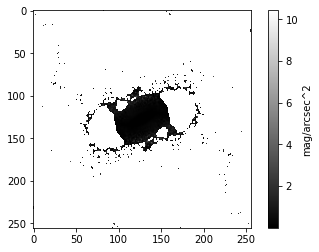

0.03391646961732106


/var/folders/_3/r4q2sf354138cwl4p6n956y00000gn/T/ipykernel_17246/2952442693.py:8: RuntimeWarning: invalid value encountered in true_divide
  asym = np.abs(a-b)/a


In [35]:
a = np.copy(sbmag)
b = np.flip(a)

plt.imshow(np.abs(a-b),cmap='gray')
plt.colorbar(label = 'mag/arcsec^2')
plt.show()

asym = np.abs(a-b)/a
print(np.nanmedian(asym[50:200,50:200]))

In [36]:
a

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
        18.89379392,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [16.44042491, 18.72855476,         nan, ..., 16.19131062,
        16.8162386 , 15.94075605],
       [17.07251699, 18.74767596,         nan, ..., 16.29005291,
        17.4954284 , 17.87324218],
       [        nan, 19.45179878, 19.45373867, ..., 15.90128328,
        16.45932704,         nan]])

In [37]:
b

array([[        nan, 16.45932704, 15.90128328, ..., 19.45373867,
        19.45179878,         nan],
       [17.87324218, 17.4954284 , 16.29005291, ...,         nan,
        18.74767596, 17.07251699],
       [15.94075605, 16.8162386 , 16.19131062, ...,         nan,
        18.72855476, 16.44042491],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, 18.89379392,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [38]:
np.abs(a-b)

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 0.14611796,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.14611796,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

Text(0.5, 1.0, 'Image2')

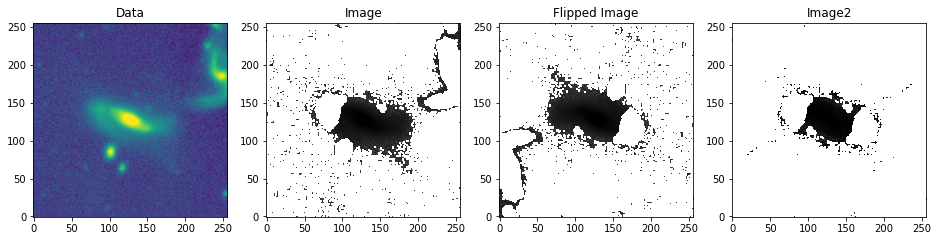

In [39]:
fig, (ax1, ax2, ax3 ,ax4) = plt.subplots(1, 4, figsize=(16, 16))
ax1.imshow(data1, origin='lower')
ax1.set_title('Data')
ax2.imshow(a, origin='lower',cmap='gray')
ax2.set_title('Image')
ax3.imshow(b, origin='lower',cmap='gray')
ax3.set_title('Flipped Image')
ax4.imshow(np.abs(a-b),cmap='gray', origin='lower')
ax4.set_title('Image2')


In [40]:
cat = SourceCatalog(data1, segm_deblend, convolved_data=convolved_data)
labels = [1, 5, 20] 
cat_subset = cat.get_labels(labels)
tbl2 = cat_subset.to_table()
tbl2['xcentroid'].info.format = '.2f'  # optional format
tbl2['ycentroid'].info.format = '.2f'
tbl2['kron_flux'].info.format = '.2f'
print(tbl2)

IndexError: index 13 is out of bounds for axis 0 with size 13

In [ ]:
cat = SourceCatalog(data1, segm_deblend, convolved_data=convolved_data)
labels = [1, 5, 20]
cat_subset = cat.get_labels(labels)
columns = ['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tbl3 = cat_subset.to_table(columns=columns)
tbl3['xcentroid'].info.format = '.4f'  # optional format
tbl3['ycentroid'].info.format = '.4f'
tbl3['segment_flux'].info.format = '.4f'
print(tbl3)

In [ ]:
cat = SourceCatalog(data1, segm_deblend, background=bkg.background)
labels = [1, 5, 20]
cat_subset = cat.get_labels(labels)
columns = ['label', 'background_centroid', 'background_mean',
           'background_sum']
tbl4 = cat_subset.to_table(columns=columns)
tbl4['background_centroid'].info.format = '{:.10f}'  # optional format
tbl4['background_mean'].info.format = '{:.10f}'
tbl4['background_sum'].info.format = '{:.10f}'
print(tbl4)

In [ ]:
from photutils.utils import calc_total_error
effective_gain = 500.0
error = calc_total_error(data1, bkg.background_rms, effective_gain)
cat = SourceCatalog(data1, segm_deblend, error=error)
labels = [1, 5, 20]
cat_subset = cat.get_labels(labels)  # select a subset of objects
columns = ['label', 'xcentroid', 'ycentroid', 'segment_flux',
           'segment_fluxerr']
tbl5 = cat_subset.to_table(columns=columns)
tbl5['xcentroid'].info.format = '{:.4f}'  # optional format
tbl5['ycentroid'].info.format = '{:.4f}'
tbl5['segment_flux'].info.format = '{:.4f}'
tbl5['segment_fluxerr'].info.format = '{:.4f}'
for col in tbl5.colnames:
    tbl5[col].info.format = '%.8g'  # for consistent table output
print(tbl5)